# Mini project : Binary classification "Dataset Mushroom"

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset from uci
mushroom = fetch_ucirepo(id=73)

#print(mushroom.metadata)
# variable information(to see if there is any missing data)
#print(mushroom.variables)

# Exploration & Visualisation

In [3]:
#Librairies needed
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
features =mushroom.data.features
target =mushroom.data.targets
df = pd.concat([pd.DataFrame(features), pd.DataFrame(target)], axis=1)

In [5]:
target

,poisonous
0,p
1,e
2,e
3,p
4,e
...,...
8119,e
8120,e
8121,e
8122,p


In [6]:
#Describe the dataset
print("First 5 rows:\n")
print( df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nSummary Statistics:\n")
print(df.describe())

First 5 rows:

  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0         n          k           e  ...                      w   
1         b          k           e  ...                      w   
2         b          n           e  ...                      w   
3         n          n           e  ...                      w   
4         b          k           t  ...                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p        

In [7]:
x = (df == '?').any().any()
print('Invalid data : ',x)

Invalid data :  False


In [8]:
print("\nFeatures :")
print(features.columns.tolist())
print("\nDesicion variable :")
print(target.columns.tolist())
print("\nTypes of data :")
print(df.dtypes.value_counts())


Features :
['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Desicion variable :
['poisonous']

Types of data :
object    23
Name: count, dtype: int64


✅**All the features are categorical.**

In [9]:
#To know the attributs with missing values
df.isnull().sum()

,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0
stalk-shape,0


❌**2480 missing values of stalk-root. "stalk-root" is a categorical attribut so to solve this problem -> replace the missing value with the most frequent value of this attribut. We choose this method because the nombre of the missing values is important compared to the dataset so we can't delete them.**

In [10]:
features['stalk-root'].fillna(features['stalk-root'].mode()[0], inplace=True)

<ipython-input-10-05bf8fdf8bbf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features['stalk-root'].fillna(features['stalk-root'].mode()[0], inplace=True)
<ipython-input-10-05bf8fdf8bbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['stalk-root'].fillna(features['stalk-root'].mode()[0], inplace=True)


In [11]:
#Dataset aftre the traitment
features.isnull().sum()
df = pd.concat([pd.DataFrame(features), pd.DataFrame(target)], axis=1)

✅**The data is ready for the exploration.**

<ipython-input-12-1a3aee82ecef>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set1')
<ipython-input-12-1a3aee82ecef>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set1')
<ipython-input-12-1a3aee82ecef>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set1')
<ipython-input-12-1a3aee82ecef>:8: FutureWarning: 

Passing `palette` without assigning `hue` 

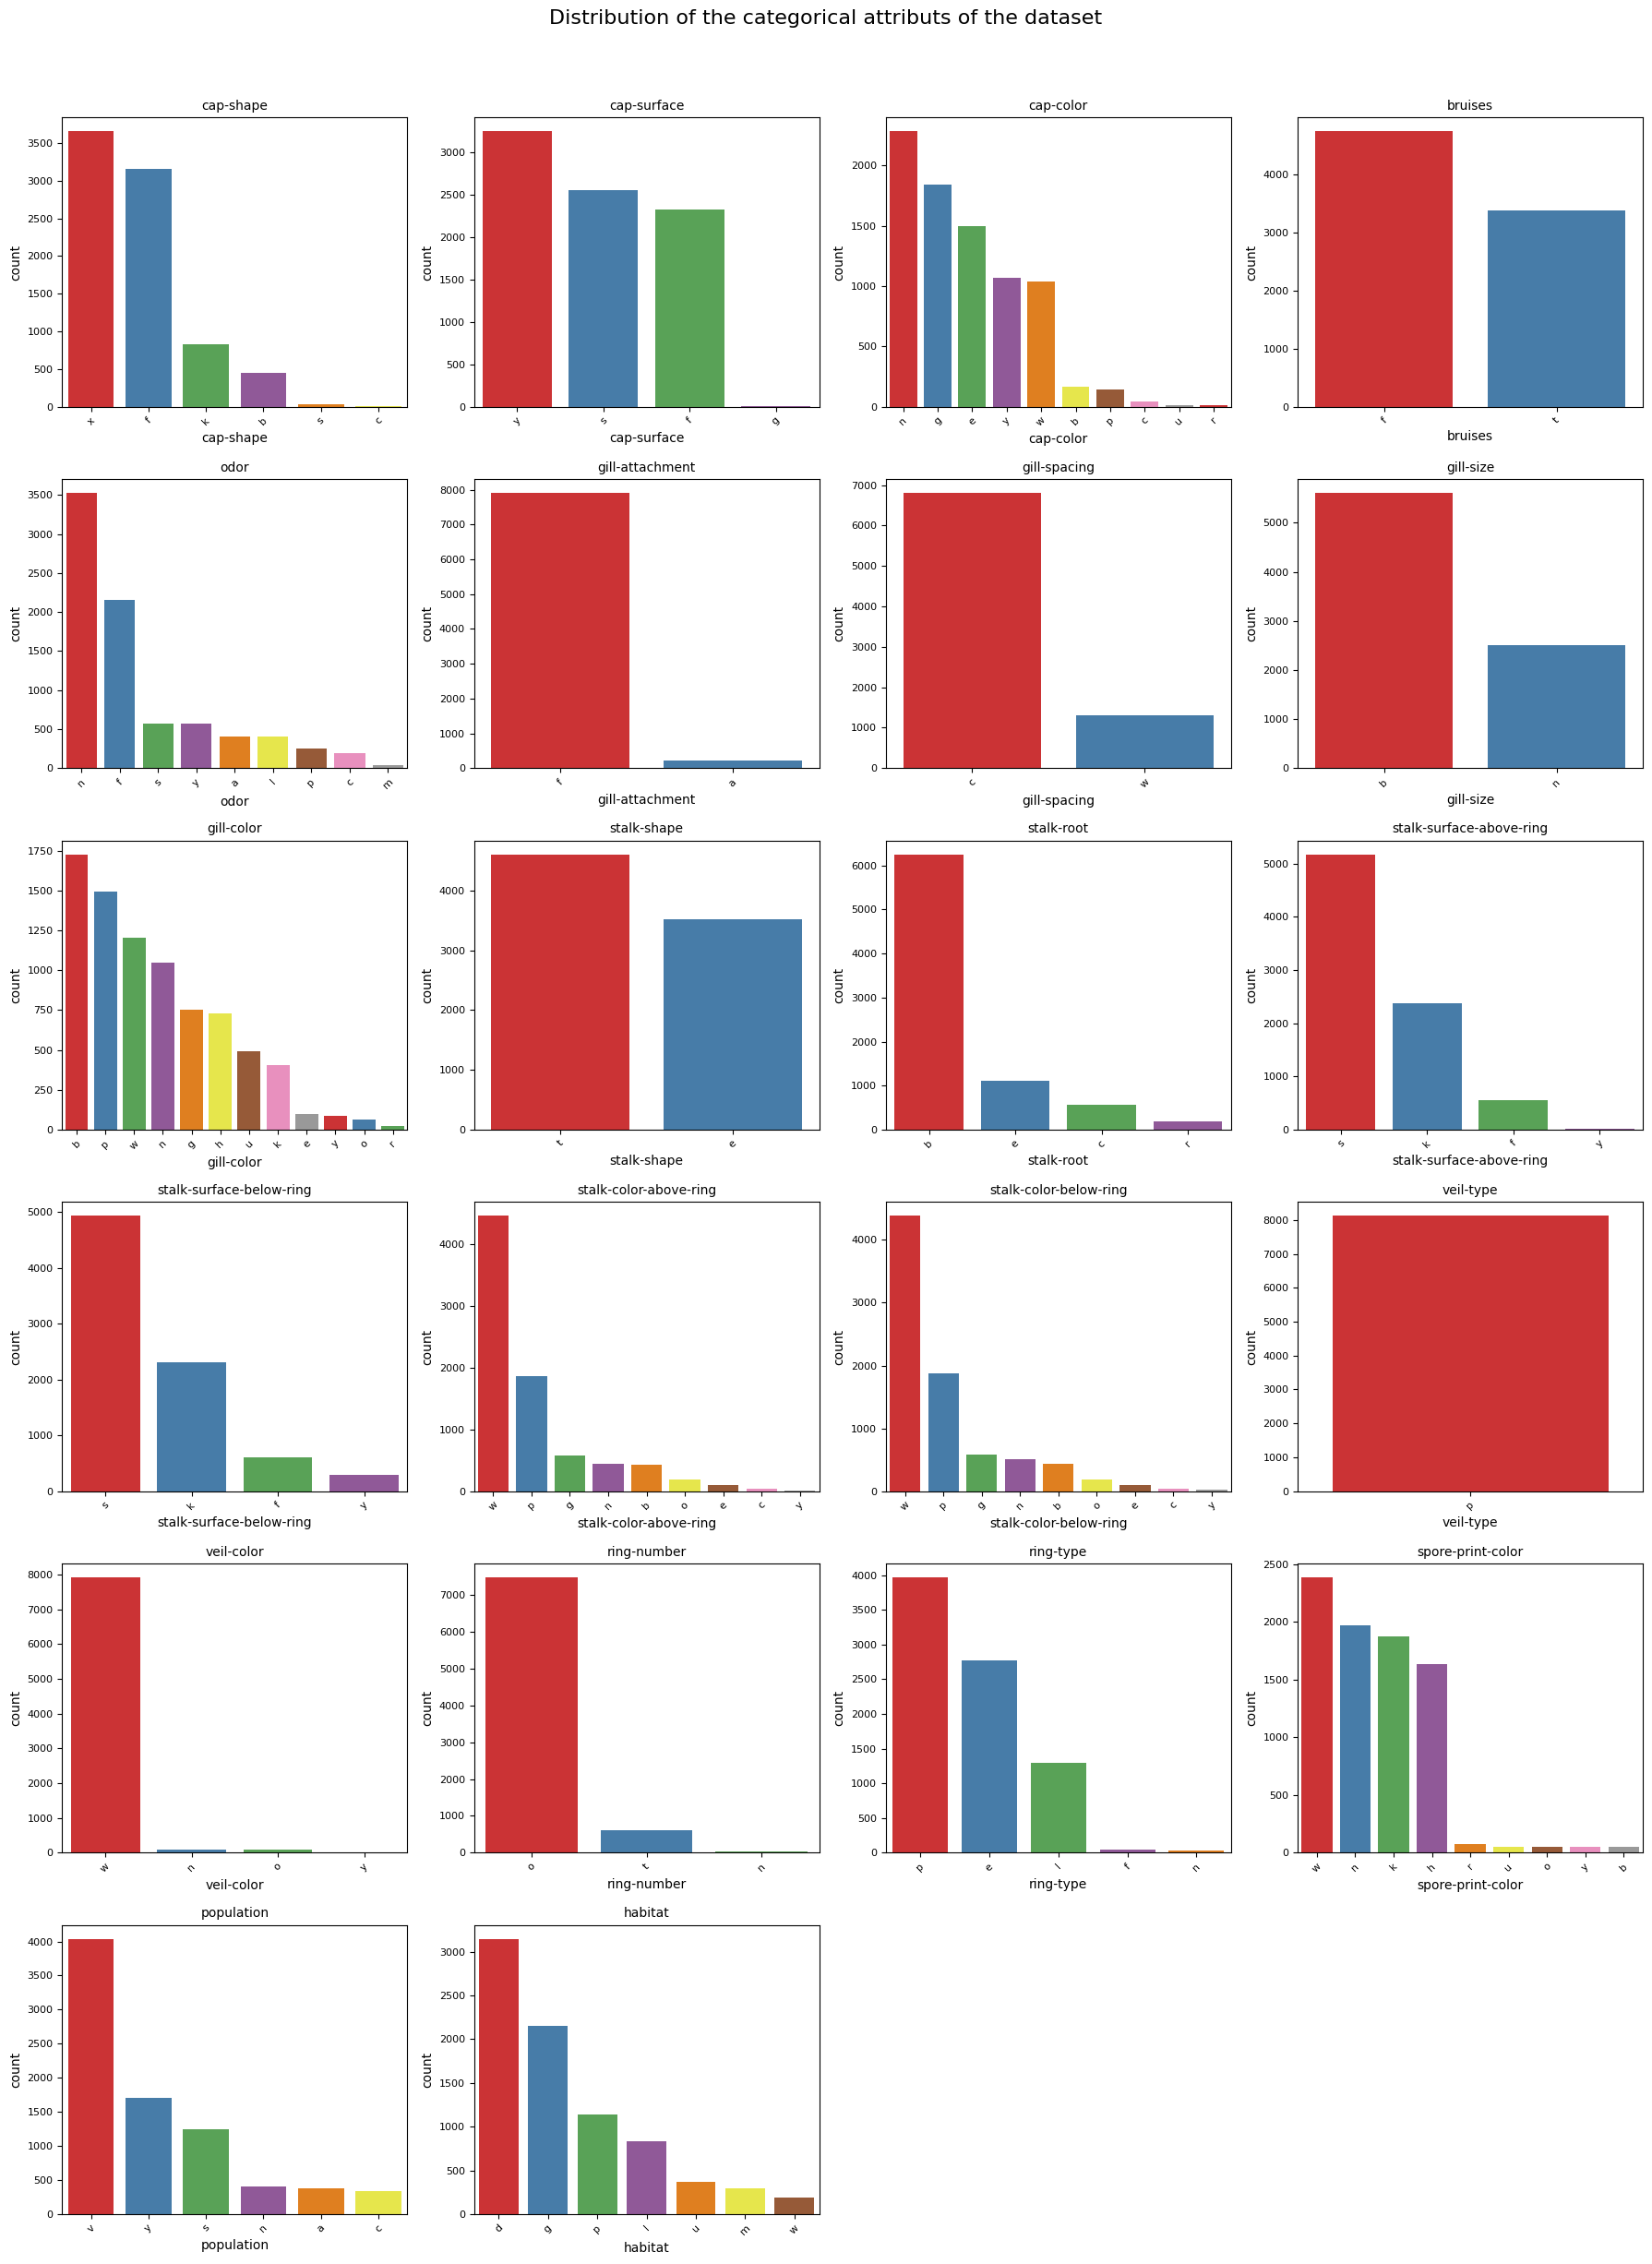

In [12]:
#with BARPLOT
n_cols = 4
n_rows = -(-len(features.columns) // n_cols)
plt.figure(figsize=(n_cols * 4.5, n_rows * 4))

for i, col in enumerate(features.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set1')
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()

plt.suptitle("Distribution of the categorical attributs of the dataset", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [13]:
nbr_dataset=df.shape[0]
nbr_veil_color = df['population'].value_counts()['a']
print(f"%: {(nbr_veil_color/nbr_dataset)*100}")

%: 4.726735598227474


In [14]:
nbr_poisonous = df['poisonous'].value_counts()['p']
nbr_edible = df['poisonous'].value_counts()['e']
print(f"% of poisonous mushrooms: {nbr_poisonous/nbr_dataset}")
print(f"% of edible mushrooms: {nbr_edible/nbr_dataset}")

% of poisonous mushrooms: 0.48202855736090594
% of edible mushrooms: 0.517971442639094


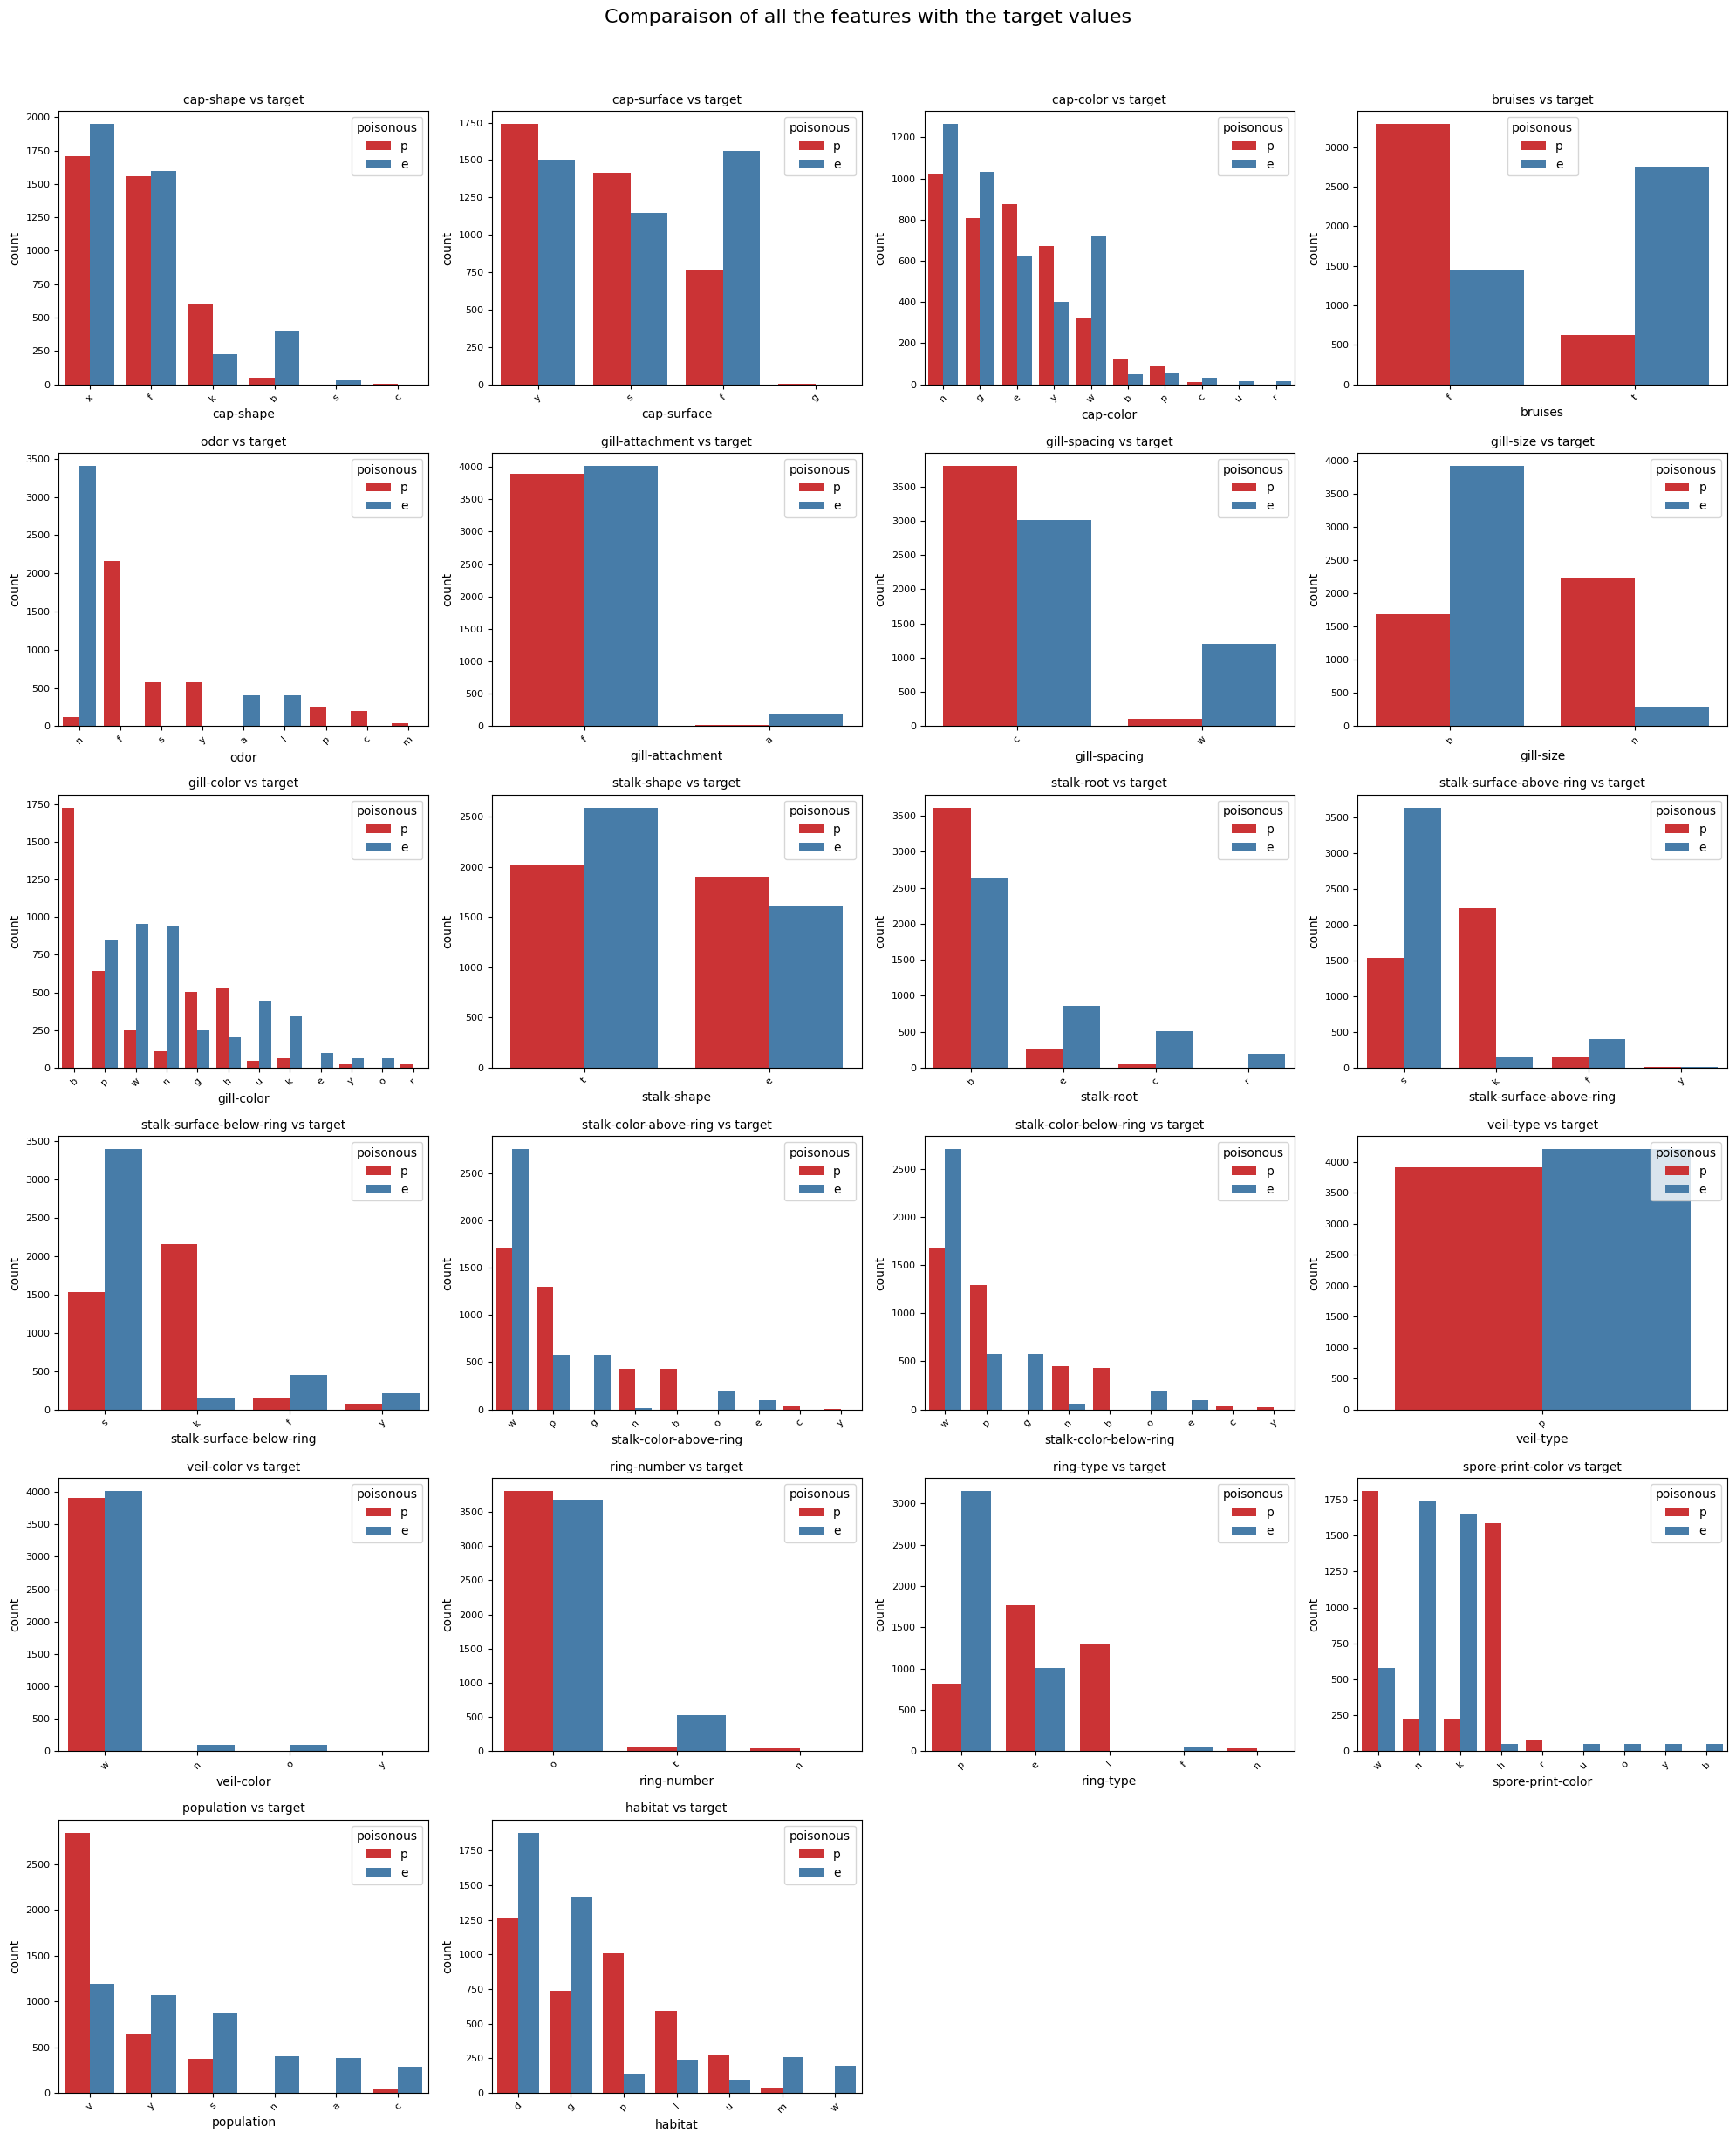

In [15]:
categorical_cols = features.columns
n_cols = 4
n_rows = -(-len(categorical_cols) // n_cols)
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue='poisonous', order=df[col].value_counts().index, palette='Set1')
    plt.title(f'{col} vs target', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()

plt.suptitle("Comparaison of all the features with the target values", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

**We will take off the feature "odor" as it has a huge correlation with the target. We want to make the dataset more complex.**

In [16]:
#drop from the dataset
features = features.drop(columns='odor')
#check the new shape
print("\nShape after dropping 'odor' features:", features.shape)


Shape after dropping 'odor' features: (8124, 21)


# **Feature Selection**

**Usage of Chi-squared test**
*  Because we treat a categorical data, we need to use other metric than the corrolation matricx that is used for continuous data to test whether two categorical variables are related to each other.
So we choose **the static test chi-square**

In [17]:
from scipy.stats import chi2_contingency

target_col = target.columns[0]
# apply the Chi-square test to each column
results = []
for col in features:
    if col == target_col:
        continue  # We do not test the target variable with itself
    # Create the contingency table
    contingency = pd.crosstab(df[col], df[target_col])
    # apply the test chi2
    chi2, p, dof, expected = chi2_contingency(contingency)
    results.append({
        'Feature': col,
        'Chi2 Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof
    })
# convert to dataframe to visualise the results
chi2_results = pd.DataFrame(results)
chi2_results.sort_values(by='Chi2 Statistic', ascending=False, inplace=True)
print(chi2_results)

                     Feature  Chi2 Statistic        p-value  \
18         spore-print-color     4602.033170   0.000000e+00   
7                 gill-color     3765.714086   0.000000e+00   
17                 ring-type     2956.619278   0.000000e+00   
10  stalk-surface-above-ring     2808.286287   0.000000e+00   
11  stalk-surface-below-ring     2684.474076   0.000000e+00   
6                  gill-size     2366.834257   0.000000e+00   
12    stalk-color-above-ring     2237.898496   0.000000e+00   
13    stalk-color-below-ring     2152.390891   0.000000e+00   
3                    bruises     2041.415647   0.000000e+00   
19                population     1929.740891   0.000000e+00   
20                   habitat     1573.777261   0.000000e+00   
9                 stalk-root     1059.124136  2.684968e-229   
5               gill-spacing      984.143333  5.022978e-216   
0                  cap-shape      489.919954  1.196457e-103   
2                  cap-color      387.597769   6.055815

<ipython-input-18-2952c31b3ded>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi2_results, x='Feature', y='Chi2 Statistic', palette='viridis')


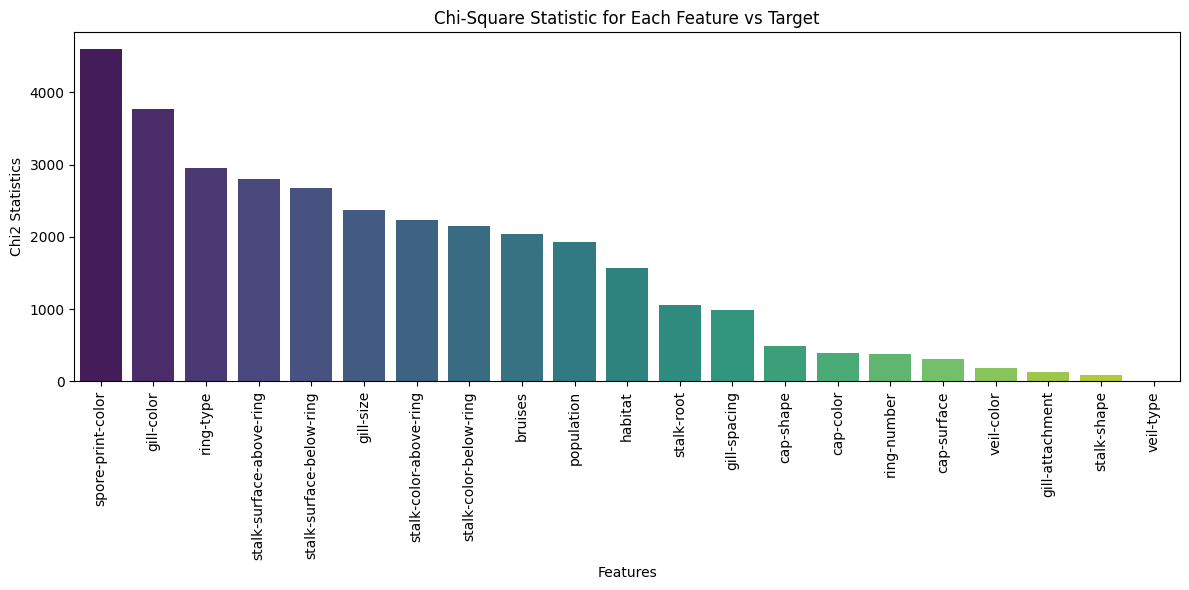

In [18]:
# Tracer les Chi² par feature
plt.figure(figsize=(12, 6))
sns.barplot(data=chi2_results, x='Feature', y='Chi2 Statistic', palette='viridis')
plt.title('Chi-Square Statistic for Each Feature vs Target')
plt.xticks(rotation=90)
plt.ylabel('Chi2 Statistics')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [19]:
# Identify the insignificant characteristics (p-value > 0.05)
insignificant_features = chi2_results[chi2_results['p-value'] > 0.05]['Feature'].tolist()
print(f"The insignificant features (p-value > 0.05): {insignificant_features}")

The insignificant features (p-value > 0.05): ['veil-type']


In [20]:
# Drop the insignificant features from the encoded dataframe
features = features.drop(columns=insignificant_features)

# Verify the new dataframe's dimensions
print("\nNew dimensions after dropping insignificant features:", features.shape)


New dimensions after dropping insignificant features: (8124, 20)


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder

# Encode the catagorical features
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(features)

# Apply the decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_encoded, target)

# Extract the feature's importance
importances = clf.feature_importances_

# Show the important features
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                     Feature  Importance
7                 gill-color    0.341473
17         spore-print-color    0.222149
18                population    0.176778
6                  gill-size    0.127365
3                    bruises    0.028572
8                stalk-shape    0.025186
19                   habitat    0.023069
13    stalk-color-below-ring    0.017071
16                 ring-type    0.016780
9                 stalk-root    0.011624
12    stalk-color-above-ring    0.003698
2                  cap-color    0.002972
11  stalk-surface-below-ring    0.001946
15               ring-number    0.001318
0                  cap-shape    0.000000
1                cap-surface    0.000000
10  stalk-surface-above-ring    0.000000
4            gill-attachment    0.000000
5               gill-spacing    0.000000
14                veil-color    0.000000


In [22]:
X_encoded

array([[5., 2., 4., ..., 2., 3., 5.],
       [5., 2., 9., ..., 3., 2., 1.],
       [0., 2., 8., ..., 3., 2., 3.],
       ...,
       [2., 2., 4., ..., 0., 1., 2.],
       [3., 3., 4., ..., 7., 4., 2.],
       [5., 2., 4., ..., 4., 1., 2.]])

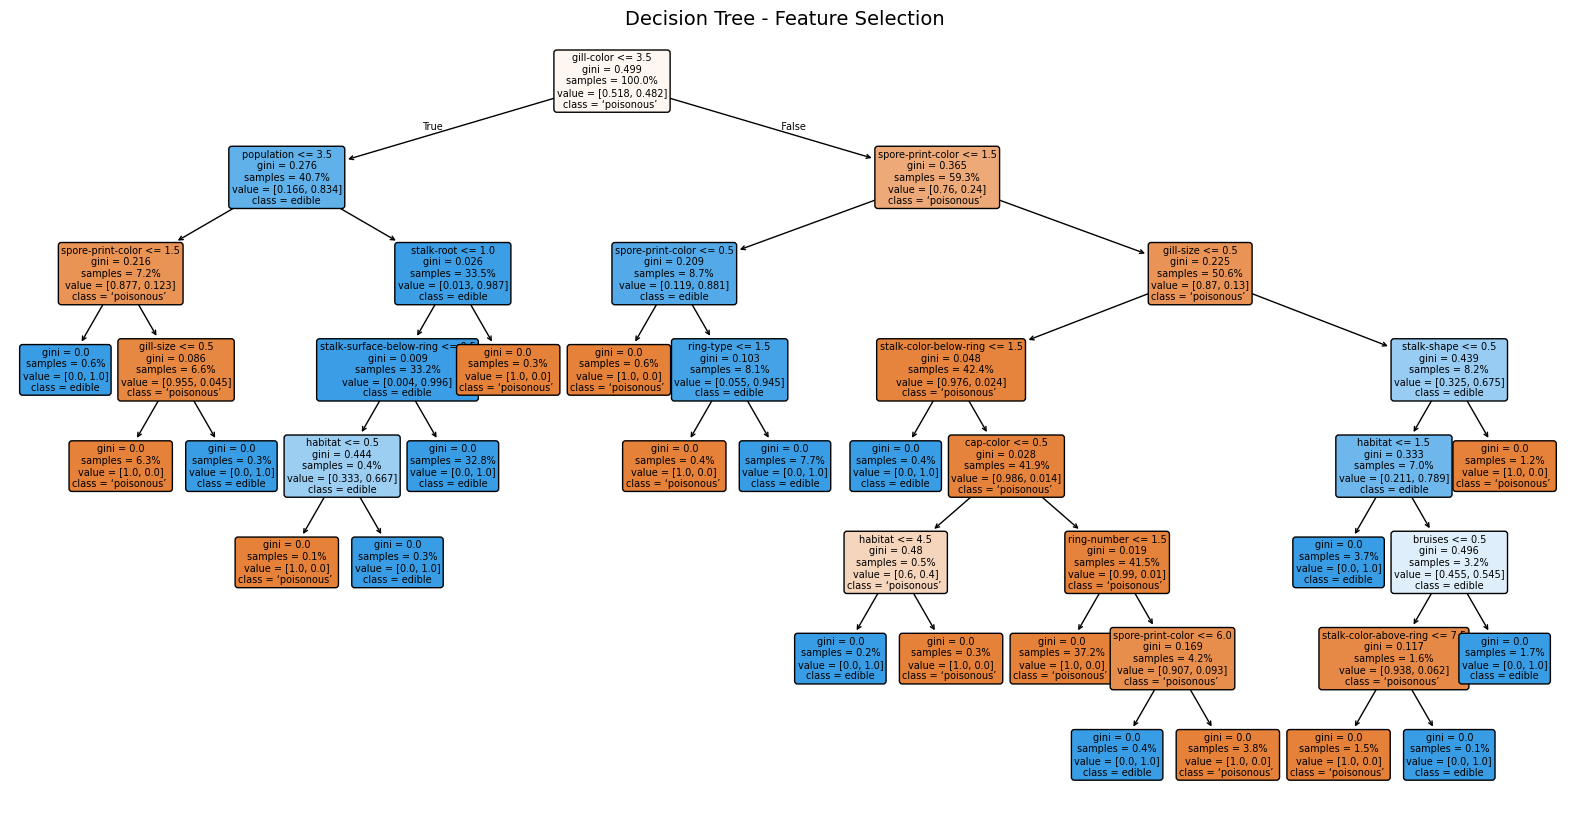

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=features.columns,
    class_names=['‘poisonous’ ','edible'],
    filled=True,  # Color the nodes
    rounded=True,
    fontsize=7,
    proportion=True  # Normalise the proportion of the nodes
)
plt.title("Decision Tree - Feature Selection", fontsize=14)
plt.show()

<ipython-input-24-38f5ec534e45>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Feature', y='Importance', palette='viridis')


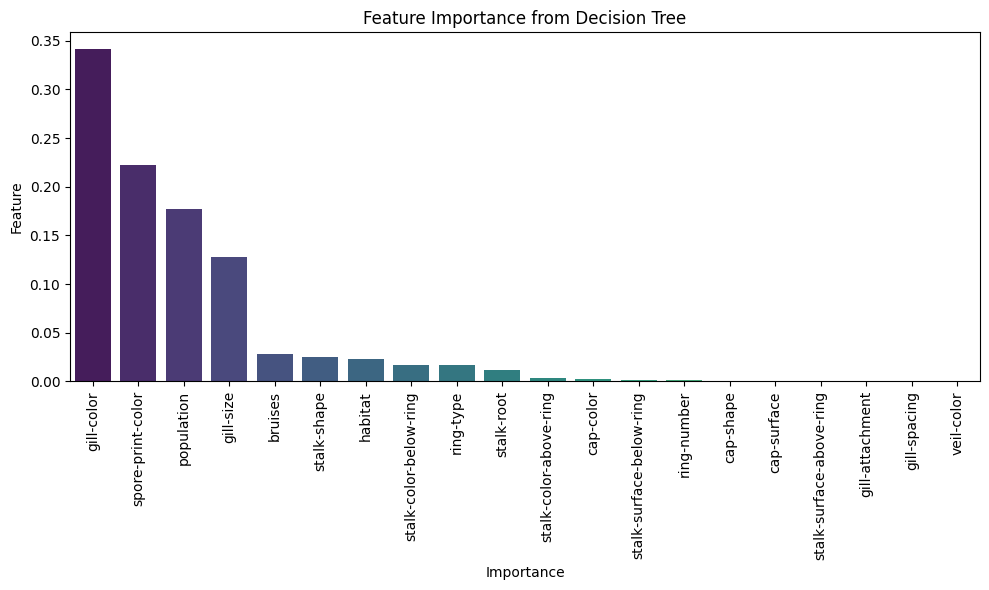

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Feature', y='Importance', palette='viridis')
plt.title("Feature Importance from Decision Tree")
plt.xticks(rotation=90)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [25]:
# choose a threshold 0.01
threshold = 0.01
selected_features = importance_df[importance_df['Importance'] > threshold].index
# show the conserved features
print("Conserved features :", features.columns[selected_features])

Conserved features : Index(['gill-color', 'spore-print-color', 'population', 'gill-size', 'bruises',
       'stalk-shape', 'habitat', 'stalk-color-below-ring', 'ring-type',
       'stalk-root'],
      dtype='object')


In [26]:
# drop the least important features
features = features[features.columns[selected_features]]

In [27]:
features

,gill-color,spore-print-color,population,gill-size,bruises,stalk-shape,habitat,stalk-color-below-ring,ring-type,stalk-root
0,k,k,s,n,t,e,u,w,p,e
1,k,n,n,b,t,e,g,w,p,c
2,n,n,n,b,t,e,m,w,p,c
3,n,k,s,n,t,e,u,w,p,e
4,k,n,a,b,f,t,g,w,e,e
...,...,...,...,...,...,...,...,...,...,...
8119,y,b,c,b,f,e,l,o,p,b
8120,y,b,v,b,f,e,l,o,p,b
8121,n,b,c,b,f,e,l,o,p,b
8122,b,w,v,n,f,t,l,w,e,b


⚠️ Although we removed many features, the ones we are left with are useless, not diverse, and not informative.

# KNN

**Standardize the data**: KNN is a distance-based algorithm, so standardization is crucial (to prevent features with large values from dominating the distance).

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [29]:
# Data traitement
# OneHotEncoding for categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(features)

# Split with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, target, test_size=0.3, stratify=target, random_state=42
)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(1, 21, 2)),  # Odd values only
    'weights': ['uniform', 'distance'],
    'metric': ['hamming', 'jaccard', 'rogerstanimoto']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Best Hyperparameters: {'metric': 'hamming', 'n_neighbors': 1, 'weights': 'uniform'}


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

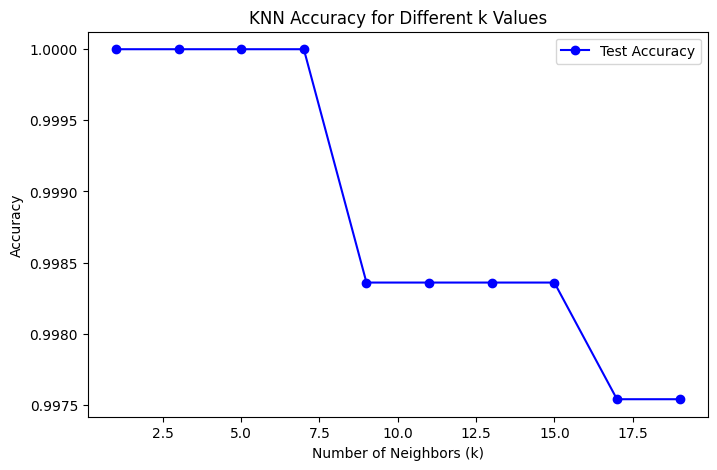

In [31]:
k_values = list(range(1, 21,2)) #only the prime integers
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,
                               weights=best_params['weights'],
                               metric=best_params['metric'])
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label="Test Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different k Values")
plt.legend()
plt.show()

In [32]:
best_knn = KNeighborsClassifier(n_neighbors=7,
                               weights=best_params['weights'],
                               metric=best_params['metric'])
best_knn.fit(X_train, y_train)

y_pred_test = best_knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy with Best Parameters: {accuracy_test:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test Accuracy with Best Parameters: 1.00


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1263
           p       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



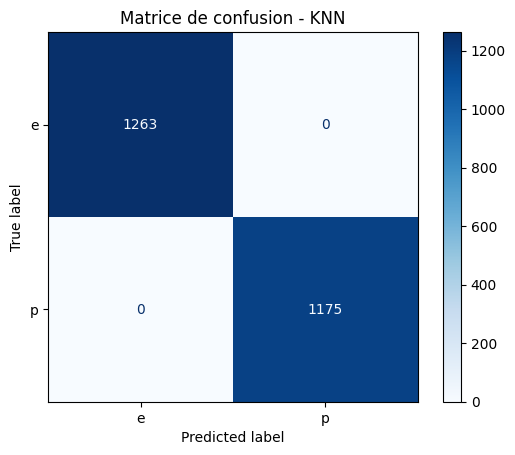

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - KNN")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


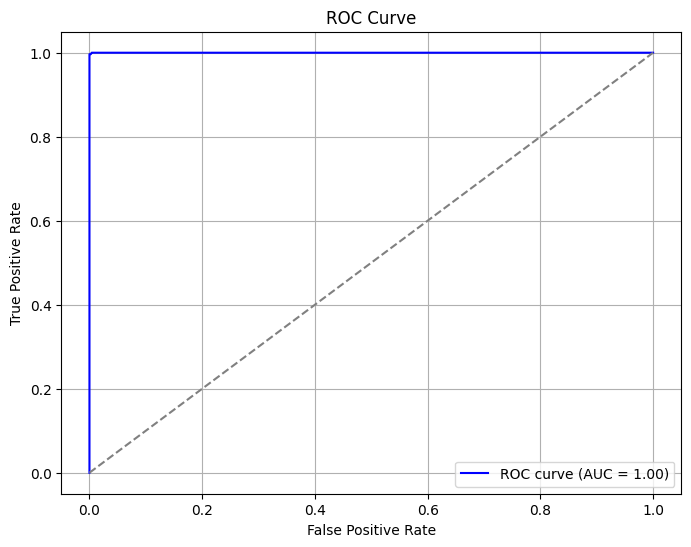

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

y_scores = knn.predict_proba(X_test)[:, 1] # pour la classe 'edible'
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_scores)
auc = roc_auc_score(y_test_encoded, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [36]:
print(y_train_encoded)

[0 0 1 ... 0 0 1]


In [37]:
import numpy as np
X_total = np.concatenate((X_train, X_test), axis=0)
y_total = np.concatenate((y_train, y_test), axis=0)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

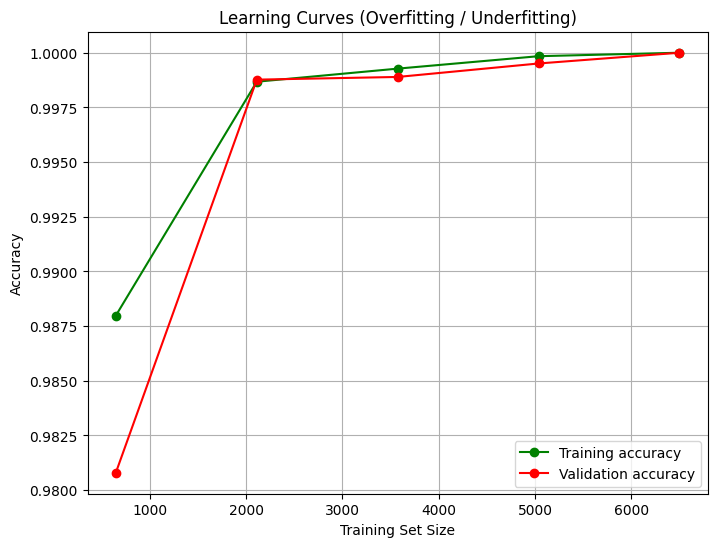

In [38]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(best_knn, X_total, y_total, cv=5)
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='green', label='Training accuracy')
plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation accuracy')
plt.title('Learning Curves (Overfitting / Underfitting)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_knn, X_total, y_total, cv=5)
print('the mean scores :',scores.mean())

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

the mean scores : 1.0


# Desicion Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split, GridSearchCV

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, target, test_size=0.3, stratify=target, random_state=42
)

**Decision Tree without Parameters (Pre-pruning)**

In [42]:
def train_decision_tree_without_params():
    # Create a decision tree classifier without specifying any pruning parameters
    dt_default = DecisionTreeClassifier(random_state=42)
    dt_default.fit(X_train, y_train)

    # Predict and evaluate
    y_pred_default = dt_default.predict(X_test)
    print("Default Decision Tree Performance:")
    print(classification_report(y_test, y_pred_default))

    return dt_default

dt_default = train_decision_tree_without_params()

#  Pre-pruning Techniques
def train_decision_tree_with_pre_pruning():
    # Pre-pruning parameters
    dt_pre_pruned = DecisionTreeClassifier(
        max_depth=5,  # Limit tree depth
        min_samples_split=20,  # Minimum samples to split an internal node
        min_samples_leaf=10,  # Minimum samples in a leaf node
        random_state=42
    )
    dt_pre_pruned.fit(X_train, y_train)

    # Predict and evaluate
    y_pred_pre_pruned = dt_pre_pruned.predict(X_test)
    print("\nPre-pruned Decision Tree Performance:")
    print(classification_report(y_test, y_pred_pre_pruned))

    return dt_pre_pruned
dt_pre_pruned = train_decision_tree_with_pre_pruning()


Default Decision Tree Performance:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1263
           p       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Pre-pruned Decision Tree Performance:
              precision    recall  f1-score   support

           e       1.00      0.98      0.99      1263
           p       0.98      1.00      0.99      1175

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



**Post-pruning (Cost Complexity Pruning)**

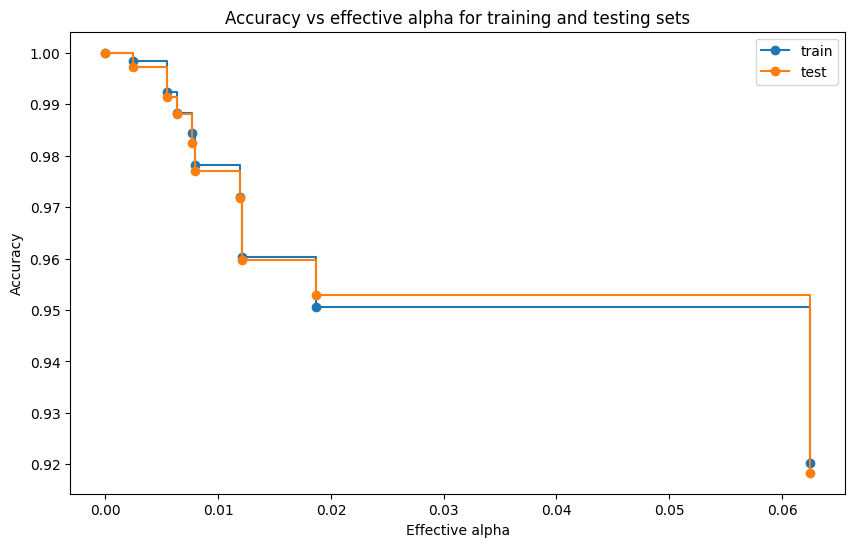


Best CCP Alpha: 0.0


In [43]:
import numpy as np
from sklearn.model_selection import GridSearchCV
def perform_post_pruning():
    # Create decision tree with path for pruning
    dt = DecisionTreeClassifier(random_state=42)
    path = dt.cost_complexity_pruning_path(X_train, y_train)

    # Get alphas and their corresponding trees
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    # Train trees with different alpha values
    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
        clf.fit(X_train, y_train)
        clfs.append(clf)

    # Remove the last element as it is the trivial tree with only one node
    clfs = clfs[:-1]
    ccp_alphas = ccp_alphas[:-1]

    # Compute accuracy of trees
    train_scores = [clf.score(X_train, y_train) for clf in clfs]
    test_scores = [clf.score(X_test, y_test) for clf in clfs]

    # Plot accuracy vs alpha
    plt.figure(figsize=(10, 6))
    plt.plot(ccp_alphas, train_scores, marker='o', label="train",
             drawstyle="steps-post")
    plt.plot(ccp_alphas, test_scores, marker='o', label="test",
             drawstyle="steps-post")
    plt.xlabel("Effective alpha")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs effective alpha for training and testing sets")
    plt.legend()
    plt.show()

    # Find the best alpha
    best_index = np.argmax(test_scores)
    best_alpha = ccp_alphas[best_index]
    print(f"\nBest CCP Alpha: {best_alpha}")

    # Train final pruned tree with best alpha
    best_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
    best_dt_pruned.fit(X_train, y_train)

    return best_dt_pruned, best_alpha, ccp_alphas, test_scores

dt_post_pruned, best_alpha, ccp_alphas, test_scores = perform_post_pruning()

**Visualize the Tree**

In [44]:
print(len(features.columns))
print(features.columns)
print(X_train.shape)

10
Index(['gill-color', 'spore-print-color', 'population', 'gill-size', 'bruises',
       'stalk-shape', 'habitat', 'stalk-color-below-ring', 'ring-type',
       'stalk-root'],
      dtype='object')
(5686, 58)



Best CCP Alpha: 0.0


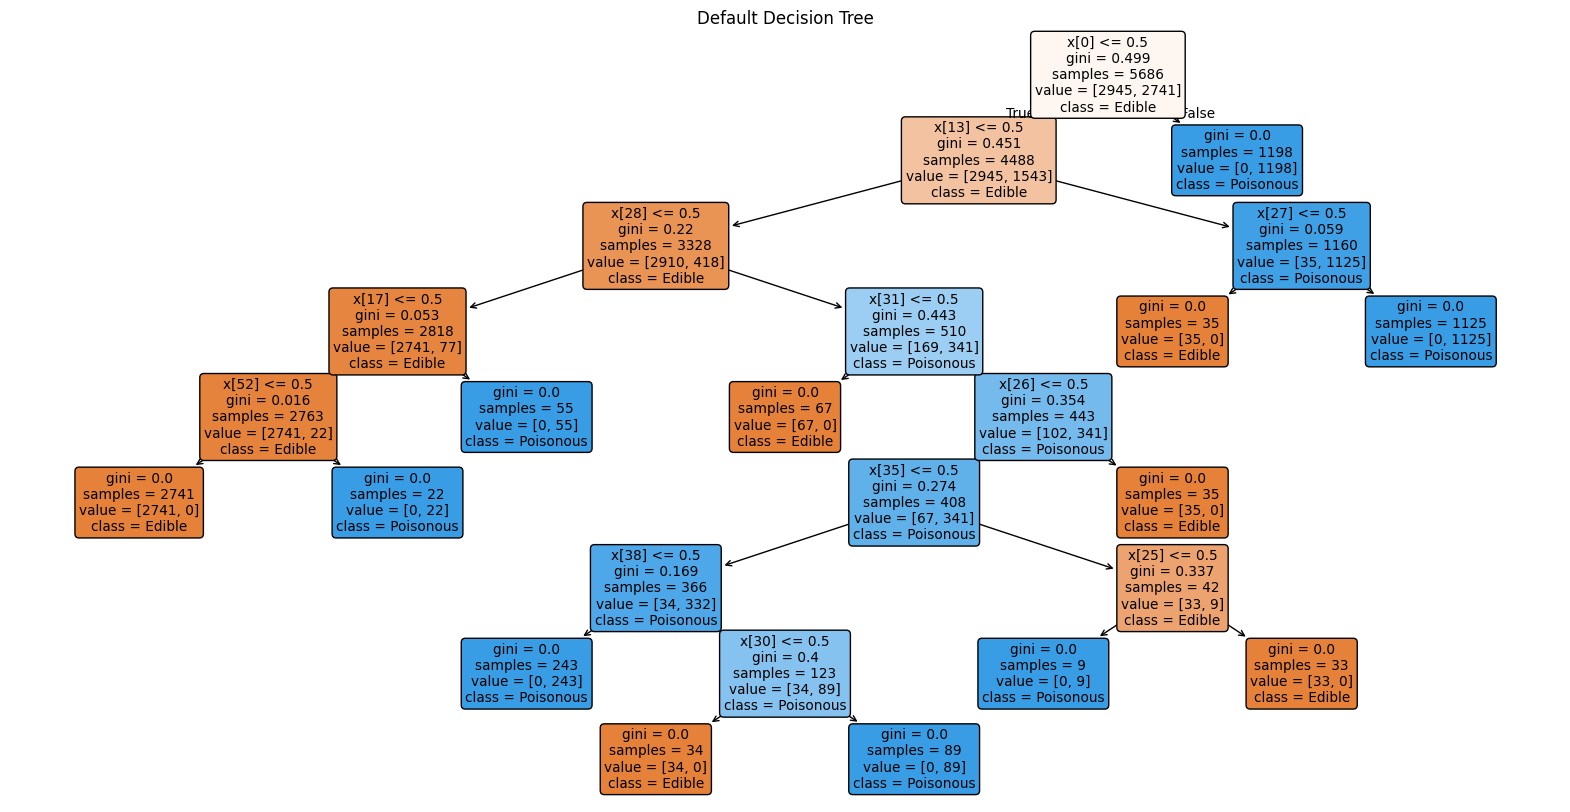

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def visualize_tree(dt, X_train, y_train, ccp_alphas, test_scores, title='Decision Tree Visualization'):
    # Find the best alpha
    best_index = np.argmax(test_scores)
    best_alpha = ccp_alphas[best_index]
    print(f"\nBest CCP Alpha: {best_alpha}")

    # Train final pruned tree with best alpha
    best_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
    best_dt_pruned.fit(X_train, y_train)

    # Plot the tree
    plt.figure(figsize=(20,10))
    plot_tree(best_dt_pruned,

              class_names=['Edible', 'Poisonous'],
              filled=True,
              rounded=True)
    plt.title(title)
    plt.show()

    return best_dt_pruned, best_alpha
best_tree, best_alpha = visualize_tree(dt_default, X_train, y_train  , ccp_alphas, test_scores, 'Default Decision Tree')




**Feature Importance**

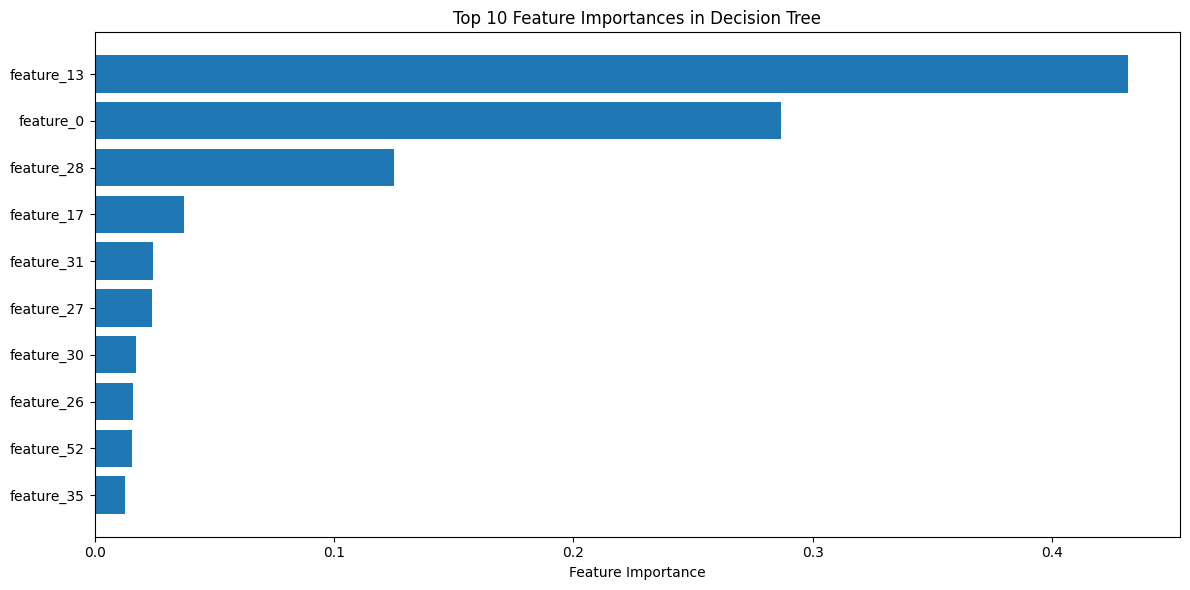

In [46]:
def show_feature_importance(dt, feature_names, top_n=10):
    feature_importance = dt.feature_importances_
    sorted_idx = np.argsort(feature_importance)[-top_n:]
    pos = np.arange(top_n) + 0.5

    plt.figure(figsize=(12, 6))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, [feature_names[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title(f'Top {top_n} Feature Importances in Decision Tree')
    plt.tight_layout()
    plt.show()
show_feature_importance(dt_default, [f'feature_{i}' for i in range(X_train.shape[1])])

**Grid Search for Hyperparameter Tuning**

In [47]:
from sklearn.tree import export_graphviz
def perform_grid_search():
    # Define parameter grid
    param_grid = {
        'criterion': ['entropy', 'gini'],  # Information Gain vs Gini Impurity
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 10],
        'ccp_alpha': [0.001, 0.01, 0.1, 0.2, 0.3]
    }

    # Perform Grid Search
    grid_search = GridSearchCV(
        DecisionTreeClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)

    # Print best parameters and score
    print("\nBest Parameters:")
    print(grid_search.best_params_)
    print(f"\nBest Cross-validation Score: {grid_search.best_score_:.4f}")

    # Evaluate best model
    best_dt = grid_search.best_estimator_
    y_pred_best = best_dt.predict(X_test)
    print("\nBest Model Performance:")
    print(classification_report(y_test, y_pred_best))

    return grid_search
grid_search = perform_grid_search()


Best Parameters:
{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best Cross-validation Score: 1.0000

Best Model Performance:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1263
           p       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



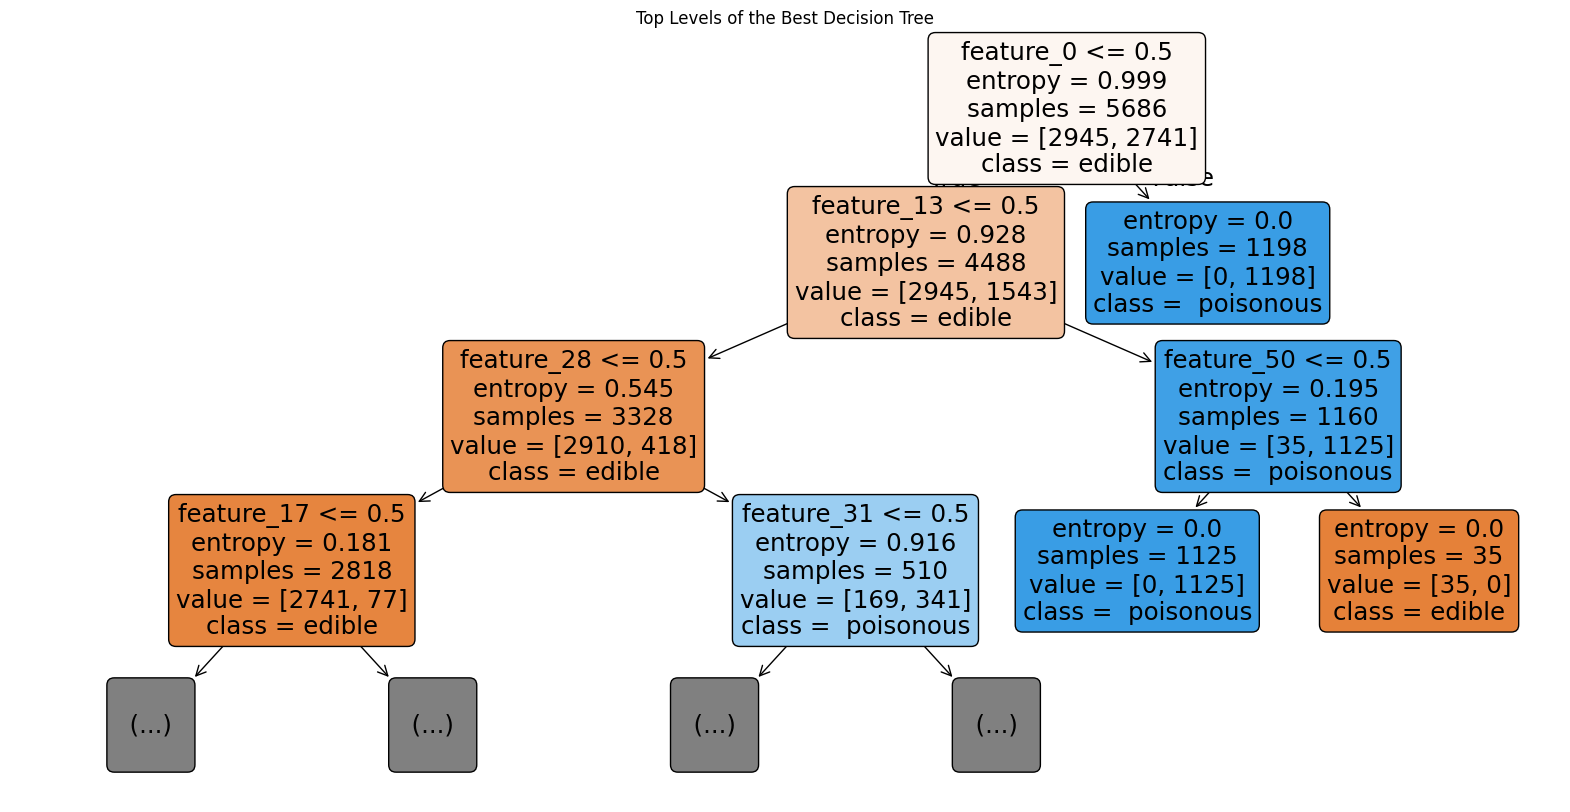

In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the best model from grid search
best_dt = grid_search.best_estimator_

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_dt,
    feature_names=[f'feature_{i}' for i in range(X_train.shape[1])],
    class_names=['edible', ' poisonous'],
    filled=True,
    rounded=True,
    max_depth=3  #  limiting depth to simplify the view
)
plt.title("Top Levels of the Best Decision Tree")
plt.show()
